### Dataset analysis

Analysis of the dataset counting label distribution, mean and std. dev. for each class and PCA.

In [1]:
from collections import Counter
import hdf5storage as h5

dataset = h5.loadmat('dataset_madrid.mat')

pixels = dataset.get('dataset')
labels = dataset.get('labels')

print('Class label distribution %s' % Counter(labels.reshape(-1)))

Class label distribution Counter({0: 6649, 1: 2576, 3: 2523, 2: 943})


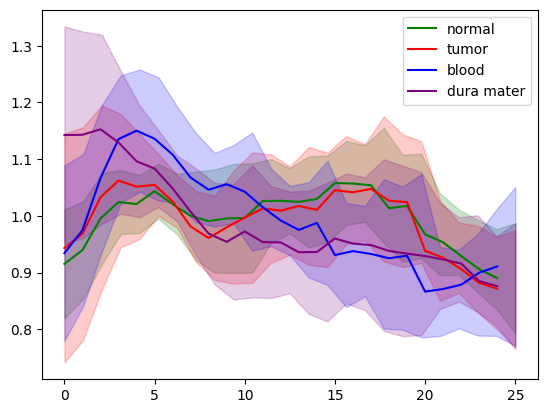

In [2]:
import numpy as np
import matplotlib.pyplot as plt

pixels = pixels.reshape(-1, 25)
labels = labels.reshape(-1)
indices_0 = np.where(labels == 0)
indices_1 = np.where(labels == 1)
indices_2 = np.where(labels == 2)
indices_3 = np.where(labels == 3)

pixels_0 = pixels[indices_0]
pixels_1 = pixels[indices_1]
pixels_2 = pixels[indices_2]
pixels_3 = pixels[indices_3]

mean_0 = np.mean(pixels_0, axis=0)
std_0 = np.std(pixels_0, axis=0)

mean_1 = np.mean(pixels_1, axis=0)
std_1 = np.std(pixels_1, axis=0)

mean_2 = np.mean(pixels_2, axis=0)
std_2 = np.std(pixels_2, axis=0)

mean_3 = np.mean(pixels_3, axis=0)
std_3 = np.std(pixels_3, axis=0)

fig = plt.figure()
plt.plot(mean_0, label='normal', color='green')
plt.plot(mean_1, label='tumor', color='red')
plt.plot(mean_2, label='blood', color='blue')
plt.plot(mean_3, label='dura mater', color='purple')

x = np.linspace(0, 25, 25)
plt.fill_between(x, mean_0 - std_0, mean_0 + std_0, color='green', alpha=0.2)
plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='red', alpha=0.2)
plt.fill_between(x, mean_2 - std_2, mean_2 + std_2, color='blue', alpha=0.2)
plt.fill_between(x, mean_3 - std_3, mean_3 + std_3, color='purple', alpha=0.2)

plt.legend()

Variance per component:
 [4.44714365e-01 1.28683254e-01 6.88347038e-02 4.42690279e-02
 3.66900636e-02 3.37692195e-02 3.17183443e-02 2.72230518e-02
 2.28626706e-02 2.07285035e-02 1.91171678e-02 1.79577341e-02
 1.62966530e-02 1.42021797e-02 1.25271845e-02 1.04175752e-02
 8.73068017e-03 8.37119557e-03 7.60832278e-03 7.03706019e-03
 6.21579262e-03 5.13214431e-03 4.56986178e-03 2.08851180e-03
 2.34732237e-04]
Total variance: 1.0


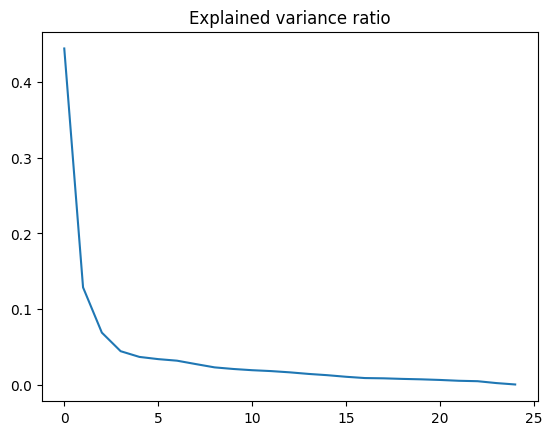

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#PCA
pca = PCA(svd_solver='full')
img_reduced_initial = pca.fit_transform(pixels)
print('Variance per component:\n',pca.explained_variance_ratio_)
print('Total variance:',np.sum(pca.explained_variance_ratio_))

fig = plt.figure()
plt.plot(pca.explained_variance_ratio_, label='variance')
plt.title('Explained variance ratio')
plt.show()

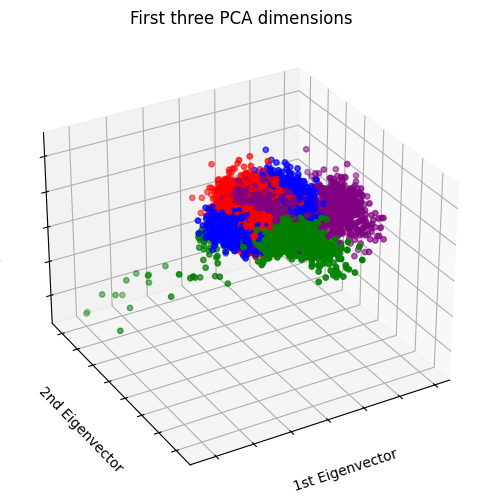

In [10]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

colors = ['red', 'blue', 'green', 'purple']
custom_cmap = ListedColormap(colors)
norm = mcolors.Normalize(vmin=0, vmax=4)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=120)

ax.scatter(
    img_reduced_initial[:, 0],
    img_reduced_initial[:, 1],
    img_reduced_initial[:, 2],
    c=labels,
    cmap=custom_cmap,
    norm=norm,
    s=15,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()